# Multivariate analysis NDVI

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
from pygam import GAM, LinearGAM, s, l
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from PIL import Image as im

## 1. Modeling NDVI for a buffer distance of 100 meters

In [2]:
# load greenspace metrics at 100m geodataframe
gdf_100 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_100_df_2.json")
gdf_100.head()

,NDVI_100,Greenspace%_100,Canopy%_100,Grass%_100,Shrubs%_100,geometry
0,0.455823,0.992861,2.168372e-17,0.006803,0.848073,POINT (386483.262 417703.544)
1,0.387782,0.521713,2.176871e-01,0.097506,0.190476,POINT (395310.475 388609.235)
2,0.389722,0.979774,5.117090e-17,0.083900,0.891156,POINT (384225.708 417867.819)
3,0.623486,0.771565,8.163265e-02,0.083900,0.612245,POINT (390673.998 416261.747)
4,0.628733,0.886972,6.643991e-01,0.052154,0.163265,POINT (393523.154 393041.484)


In [3]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_100', 'Shrubs%_100', 'Grass%_100']
df = pd.DataFrame(gdf_100, columns=cols)

# target as NDVI_100
target = pd.DataFrame(gdf_100, columns=['NDVI_100'])

# define X and Y
#X = df
y = target['NDVI_100']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 1.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [4]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_1.gridsearch(X_train, y_train, lam=lams)
ndvi_100_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9996
Link Function:                     IdentityLink Log Likelihood:                               -324268.3144
Number of Samples:                         4749 AIC:                                            648546.628
                                                AICc:                                          648546.6407
                                                GCV:                                                0.0069
                                                Scale:                                              0.0069
                                                Pseudo R-Squared:                                   0.7166
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/4165518819.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_1.summary()


### 1.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [5]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_2.gridsearch(X_train, y_train, lam=lams)
ndvi_100_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      19.696
Link Function:                     IdentityLink Log Likelihood:                               -366629.9158
Number of Samples:                         4749 AIC:                                           733301.2237
                                                AICc:                                          733301.4136
                                                GCV:                                                0.0062
                                                Scale:                                              0.0061
                                                Pseudo R-Squared:                                   0.7497
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2442450153.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_2.summary()


### 1.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [6]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_3.gridsearch(X_train, y_train, lam=lams)
ndvi_100_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     21.9807
Link Function:                     IdentityLink Log Likelihood:                               -388551.5317
Number of Samples:                         4749 AIC:                                           777149.0248
                                                AICc:                                          777149.2581
                                                GCV:                                                0.0058
                                                Scale:                                              0.0058
                                                Pseudo R-Squared:                                   0.7636
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/4073591579.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_3.summary()


### 1.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [7]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_4.gridsearch(X_train, y_train, lam=lams)
ndvi_100_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.6974
Link Function:                     IdentityLink Log Likelihood:                               -360655.4858
Number of Samples:                         4749 AIC:                                           721352.3663
                                                AICc:                                          721352.5563
                                                GCV:                                                0.0063
                                                Scale:                                              0.0062
                                                Pseudo R-Squared:                                   0.7458
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3955161003.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_4.summary()


### 1.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [8]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_5.gridsearch(X_train, y_train, lam=lams)
ndvi_100_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     37.6619
Link Function:                     IdentityLink Log Likelihood:                               -400601.1866
Number of Samples:                         4749 AIC:                                           801279.6971
                                                AICc:                                          801280.3483
                                                GCV:                                                0.0057
                                                Scale:                                              0.0056
                                                Pseudo R-Squared:                                   0.7719
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/979852687.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_5.summary()


### 1.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [9]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_6.gridsearch(X_train, y_train, lam=lams)
ndvi_100_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:12 Time:  0:00:12


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     35.3783
Link Function:                     IdentityLink Log Likelihood:                               -385554.0392
Number of Samples:                         4749 AIC:                                            771180.835
                                                AICc:                                          771181.4122
                                                GCV:                                                0.0059
                                                Scale:                                              0.0058
                                                Pseudo R-Squared:                                   0.7631
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/1329383776.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_6.summary()


### 1.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [10]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_7.gridsearch(X_train, y_train, lam=lams)
ndvi_100_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.1924
Link Function:                     IdentityLink Log Likelihood:                                -391589.958
Number of Samples:                         4749 AIC:                                           783242.3008
                                                AICc:                                          783242.7266
                                                GCV:                                                0.0058
                                                Scale:                                              0.0057
                                                Pseudo R-Squared:                                   0.7661
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2977915924.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_7.summary()


### 1.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [11]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_100_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_100_8.gridsearch(X_train, y_train, lam=lams)
ndvi_100_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     52.0461
Link Function:                     IdentityLink Log Likelihood:                               -403740.0568
Number of Samples:                         4749 AIC:                                           807586.2058
                                                AICc:                                          807587.4271
                                                GCV:                                                0.0056
                                                Scale:                                              0.0055
                                                Pseudo R-Squared:                                    0.775
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3108876825.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_100_8.summary()


### 1.9. (BEST MODEL) Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

<Figure size 432x288 with 0 Axes>

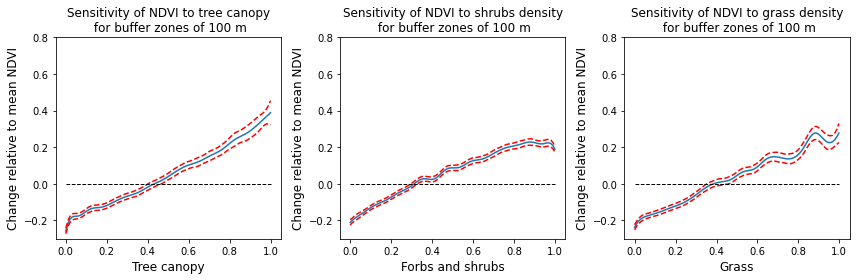

In [42]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Sensitivity of NDVI to tree canopy\n for buffer zones of 100 m', 
          'Sensitivity of NDVI to shrubs density\n for buffer zones of 100 m', 
          'Sensitivity of NDVI to grass density\n for buffer zones of 100 m']
x_labels = ['Tree canopy', 'Forbs and shrubs', 'Grass']
for i, ax in enumerate(axs):    
    XX = ndvi_100_8.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_100_8.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_100_8.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.3, 0.8)
    ax.set_xticks(list(ax.get_xticks()))
    #ax.get_yaxis().get_major_formatter().set_useOffset(False)
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')    
    ax.set_ylabel('Change relative to mean NDVI', fontsize=12)
    ax.set_xlabel(x_labels[i], fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/multivariate/gam_ndvi_100_best_plot_2.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/modelling/multivariate/gam_ndvi_100_best_plot_2.png').save('thesis_project/visualizations/modelling/multivariate/gam_ndvi_100_best_plot_2.bmp')

plt.show()

- **Parameters of the best multivaritate model (lowest GCV score) that explains NDVI for a buffer zone of 100 meters**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)
    - **Regularization penalty**: lambda = [0.1, 0.001, 0.1]
    - **Smoothness**: n_splines = [20, 20, 1]

## 2. Modeling NDVI for a buffer distance of 300 meters

In [13]:
# load greenspace metrics at 300m geodataframe
gdf_300 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_300_df_2.json")
gdf_300.head()

,NDVI_300,Greenspace%_300,Canopy%_300,Grass%_300,Shrubs%_300,geometry
0,0.280478,0.326412,0.145660,0.080623,0.097554,POINT (387760.076 393972.512)
1,0.503846,0.847073,0.062886,0.391561,0.387530,POINT (361558.182 408801.964)
2,0.589265,0.831569,0.104542,0.243752,0.480785,POINT (391126.815 417220.287)
3,0.493672,0.796394,0.127654,0.150497,0.513034,POINT (361327.964 411390.899)
4,0.343043,0.610614,0.275732,0.147272,0.190540,POINT (377099.280 400575.430)


In [14]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_300', 'Shrubs%_300', 'Grass%_300']
df = pd.DataFrame(gdf_300, columns=cols)

# target as NDVI_300
target = pd.DataFrame(gdf_300, columns=['NDVI_300'])

# define X and Y
#X = df
y = target['NDVI_300']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [15]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_1.gridsearch(X_train, y_train, lam=lams)
ndvi_300_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:01 Time:  0:00:01


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                         4.0
Link Function:                     IdentityLink Log Likelihood:                               -501248.1023
Number of Samples:                         4656 AIC:                                          1002506.2045
                                                AICc:                                         1002506.2174
                                                GCV:                                                0.0045
                                                Scale:                                              0.0045
                                                Pseudo R-Squared:                                   0.7343
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2141360453.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_1.summary()


### 2.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [16]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_2.gridsearch(X_train, y_train, lam=lams)
ndvi_300_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:56 Time:  0:00:56


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     21.4949
Link Function:                     IdentityLink Log Likelihood:                               -601516.8402
Number of Samples:                         4656 AIC:                                          1203078.6701
                                                AICc:                                         1203078.8983
                                                GCV:                                                0.0037
                                                Scale:                                              0.0037
                                                Pseudo R-Squared:                                    0.779
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/138880699.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_2.summary()


### 2.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [17]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_3.gridsearch(X_train, y_train, lam=lams)
ndvi_300_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      20.247
Link Function:                     IdentityLink Log Likelihood:                               -653747.9372
Number of Samples:                         4656 AIC:                                          1307538.3685
                                                AICc:                                         1307538.5725
                                                GCV:                                                0.0035
                                                Scale:                                              0.0034
                                                Pseudo R-Squared:                                   0.7961
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2763482722.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_3.summary()


### 2.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [18]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_4.gridsearch(X_train, y_train, lam=lams)
ndvi_300_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     16.2509
Link Function:                     IdentityLink Log Likelihood:                               -590465.9549
Number of Samples:                         4656 AIC:                                          1180966.4116
                                                AICc:                                         1180966.5473
                                                GCV:                                                0.0038
                                                Scale:                                              0.0038
                                                Pseudo R-Squared:                                   0.7745
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3450665515.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_4.summary()


### 2.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [19]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_5.gridsearch(X_train, y_train, lam=lams)
ndvi_300_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.7766
Link Function:                     IdentityLink Log Likelihood:                               -686744.9133
Number of Samples:                         4656 AIC:                                          1373553.3796
                                                AICc:                                         1373553.8302
                                                GCV:                                                0.0033
                                                Scale:                                              0.0033
                                                Pseudo R-Squared:                                   0.8066
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/1916949231.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_5.summary()


### 2.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [20]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_6.gridsearch(X_train, y_train, lam=lams)
ndvi_300_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:15 Time:  0:00:15


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     38.3238
Link Function:                     IdentityLink Log Likelihood:                               -652814.1322
Number of Samples:                         4656 AIC:                                          1305706.9119
                                                AICc:                                         1305707.5989
                                                GCV:                                                0.0035
                                                Scale:                                              0.0034
                                                Pseudo R-Squared:                                   0.7974
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2187392072.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_6.summary()


### 2.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [21]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_7.gridsearch(X_train, y_train, lam=lams)
ndvi_300_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     30.0383
Link Function:                     IdentityLink Log Likelihood:                               -679414.8326
Number of Samples:                         4656 AIC:                                          1358891.7417
                                                AICc:                                         1358892.1719
                                                GCV:                                                0.0033
                                                Scale:                                              0.0033
                                                Pseudo R-Squared:                                   0.8045
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2141254406.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_7.summary()


### 2.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [22]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_300_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_300_8.gridsearch(X_train, y_train, lam=lams)
ndvi_300_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:13 Time:  0:00:13


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     47.5169
Link Function:                     IdentityLink Log Likelihood:                               -714716.4087
Number of Samples:                         4656 AIC:                                          1429529.8512
                                                AICc:                                         1429530.8942
                                                GCV:                                                0.0032
                                                Scale:                                              0.0031
                                                Pseudo R-Squared:                                   0.8153
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/547711982.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_300_8.summary()


### 2.9. (BEST MODEL) Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

<Figure size 432x288 with 0 Axes>

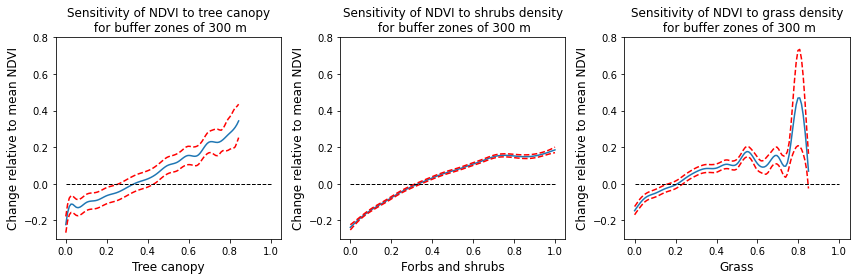

In [41]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Sensitivity of NDVI to tree canopy\n for buffer zones of 300 m', 
          'Sensitivity of NDVI to shrubs density\n for buffer zones of 300 m', 
          'Sensitivity of NDVI to grass density\n for buffer zones of 300 m']
x_labels = ['Tree canopy', 'Forbs and shrubs', 'Grass']
for i, ax in enumerate(axs):
    XX = ndvi_300_8.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_300_8.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_300_8.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.3, 0.8)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Change relative to mean NDVI', fontsize=12)
    ax.set_xlabel(x_labels[i], fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/multivariate/gam_ndvi_300_best_plot_2.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/modelling/multivariate/gam_ndvi_300_best_plot_2.png').save('thesis_project/visualizations/modelling/multivariate/gam_ndvi_300_best_plot_2.bmp')

plt.show()

- **Parameters of the best multivaritate model (lowest GCV score) that explains NDVI for a buffer zone of 300 meters**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)
    - **Regularization penalty**: lambda = [0.001, 10, 10]
    - **Smoothness**: n_splines = 20


## 3. Modeling NDVI for a buffer distance of 500 meters

In [24]:
# load greenspace metrics at 500m geodataframe
gdf_500 = gpd.read_file("thesis_project/output/dataframes/greenspace_metrics_500_df_2.json")
gdf_500.head()

,NDVI_500,Greenspace%_500,Canopy%_500,Grass%_500,Shrubs%_500,geometry
0,0.407077,0.982575,0.006176,0.028919,0.947064,POINT (401901.359 408671.581)
1,0.441260,0.575357,0.167827,0.131850,0.277816,POINT (368835.367 407479.786)
2,0.312300,0.395262,0.212136,0.095873,0.087050,POINT (377751.293 401260.842)
3,0.283220,0.355313,0.098324,0.070777,0.188119,POINT (391535.548 395524.756)
4,0.552286,0.770303,0.265954,0.094795,0.409666,POINT (369836.790 402258.456)


In [25]:
# Grass, Canopy, and Shrubs as predictors
cols = ['Canopy%_500', 'Shrubs%_500', 'Grass%_500']
df = pd.DataFrame(gdf_500, columns=cols)

# target as NDVI_500
target = pd.DataFrame(gdf_500, columns=['NDVI_500'])

# define X and Y
#X = df
y = target['NDVI_500']
X = df.iloc[:, 0:3].values

# split independent and dependent variables into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 3.1. Model 1: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [26]:
# Model 1
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_1 = LinearGAM(l(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_1.gridsearch(X_train, y_train, lam=lams)
ndvi_500_1.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      3.9999
Link Function:                     IdentityLink Log Likelihood:                               -288532.8263
Number of Samples:                         2316 AIC:                                           577075.6524
                                                AICc:                                          577075.6783
                                                GCV:                                                0.0039
                                                Scale:                                              0.0039
                                                Pseudo R-Squared:                                   0.7147
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/1220089107.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_1.summary()


### 3.2. Model 2: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + linear(grass)

In [27]:
# Model 2
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_2 = LinearGAM(s(0) + l(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_2.gridsearch(X_train, y_train, lam=lams)
ndvi_500_2.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     15.7745
Link Function:                     IdentityLink Log Likelihood:                               -321062.3011
Number of Samples:                         2316 AIC:                                           642158.1511
                                                AICc:                                          642158.4106
                                                GCV:                                                0.0035
                                                Scale:                                              0.0035
                                                Pseudo R-Squared:                                   0.7455
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/2940222901.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_2.summary()


### 3.3. Model 3: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [28]:
# Model 3
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_3 = LinearGAM(l(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_3.gridsearch(X_train, y_train, lam=lams)
ndvi_500_3.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:03 Time:  0:00:03


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.9292
Link Function:                     IdentityLink Log Likelihood:                               -383984.1565
Number of Samples:                         2316 AIC:                                           767994.1714
                                                AICc:                                          767994.3279
                                                GCV:                                                0.0029
                                                Scale:                                              0.0029
                                                Pseudo R-Squared:                                   0.7855
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3773330009.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_3.summary()


### 3.4. Model 4: NDVI ~ linear(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [29]:
# Model 4
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_4 = LinearGAM(l(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_4.gridsearch(X_train, y_train, lam=lams)
ndvi_500_4.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     11.3218
Link Function:                     IdentityLink Log Likelihood:                               -329813.7655
Number of Samples:                         2316 AIC:                                           659652.1746
                                                AICc:                                          659652.3171
                                                GCV:                                                0.0034
                                                Scale:                                              0.0034
                                                Pseudo R-Squared:                                   0.7511
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/755273682.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_4.summary()


### 3.5. Model 5: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + linear(grass)

In [30]:
# Model 5
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_5 = LinearGAM(s(0) + s(1) + l(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_5.gridsearch(X_train, y_train, lam=lams)
ndvi_500_5.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     26.1445
Link Function:                     IdentityLink Log Likelihood:                               -397276.6384
Number of Samples:                         2316 AIC:                                           794607.5658
                                                AICc:                                          794608.2336
                                                GCV:                                                0.0029
                                                Scale:                                              0.0028
                                                Pseudo R-Squared:                                   0.7951
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3854426641.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_5.summary()


### 3.6. Model 6: NDVI ~ spline(tree canopy) + linear(forbs and shrubs) + spline(grass)

In [31]:
# Model 6
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_6 = LinearGAM(s(0) + l(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_6.gridsearch(X_train, y_train, lam=lams)
ndvi_500_6.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:08 Time:  0:00:08


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     27.8966
Link Function:                     IdentityLink Log Likelihood:                               -349491.5363
Number of Samples:                         2316 AIC:                                           699040.8658
                                                AICc:                                          699041.6216
                                                GCV:                                                0.0032
                                                Scale:                                              0.0032
                                                Pseudo R-Squared:                                   0.7682
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/1996838194.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_6.summary()


### 3.7. Model 7: NDVI ~ linear(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [32]:
# Model 7
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_7 = LinearGAM(l(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_7.gridsearch(X_train, y_train, lam=lams)
ndvi_500_7.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.1505
Link Function:                     IdentityLink Log Likelihood:                               -401162.8729
Number of Samples:                         2316 AIC:                                           802366.0467
                                                AICc:                                          802366.4181
                                                GCV:                                                0.0028
                                                Scale:                                              0.0028
                                                Pseudo R-Squared:                                   0.7958
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/3717736121.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_7.summary()


### 3.8. Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

In [33]:
# Model 8
warnings.filterwarnings("ignore", category=RuntimeWarning)
ndvi_500_8 = LinearGAM(s(0) + s(1) + s(2)).fit(X_train, y_train)

# using gridsearch to tune the lambdas
lam = np.logspace(-3, 5, 5)
lams = [lam] * 3

ndvi_500_8.gridsearch(X_train, y_train, lam=lams)
ndvi_500_8.summary()

100% (125 of 125) |######################| Elapsed Time: 0:00:24 Time:  0:00:24


LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     40.7244
Link Function:                     IdentityLink Log Likelihood:                               -418549.3081
Number of Samples:                         2316 AIC:                                            837182.065
                                                AICc:                                          837183.6333
                                                GCV:                                                0.0027
                                                Scale:                                              0.0026
                                                Pseudo R-Squared:                                   0.8078
Feature Function                  Lam

/var/folders/6g/kgz5rml118s6lqw25w5sv5mr0000gn/T/ipykernel_2261/1642183498.py:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  ndvi_500_8.summary()


### 3.9. (BEST MODEL) Model 8: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)

<Figure size 432x288 with 0 Axes>

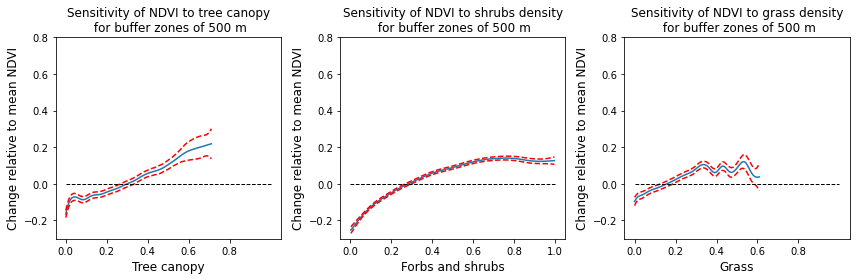

In [43]:
## plotting
plt.figure();
fig, axs = plt.subplots(1,3,figsize=(12,4));

titles = ['Sensitivity of NDVI to tree canopy\n for buffer zones of 500 m', 
          'Sensitivity of NDVI to shrubs density\n for buffer zones of 500 m', 
          'Sensitivity of NDVI to grass density\n for buffer zones of 500 m']
x_labels = ['Tree canopy', 'Forbs and shrubs', 'Grass']
for i, ax in enumerate(axs):
    XX = ndvi_500_8.generate_X_grid(term=i)
    ax.plot(XX[:, i], ndvi_500_8.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], ndvi_500_8.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.set_ylim(-0.3, 0.8)
    ax.set_xticks(list(ax.get_xticks()))
    ax.hlines(y=0, xmin=0, xmax=1, linewidth=1, color='black', linestyle='--')
    ax.set_ylabel('Change relative to mean NDVI', fontsize=12)
    ax.set_xlabel(x_labels[i], fontsize=12)
    ax.set_title(titles[i], fontsize=12);
    
# non-overlapping subplots
plt.tight_layout()
    
# save the figure
plt.savefig('thesis_project/visualizations/modelling/multivariate/gam_ndvi_500_best_plot_2.png', dpi=300, bbox_inches='tight')
im.open('thesis_project/visualizations/modelling/multivariate/gam_ndvi_500_best_plot_2.png').save('thesis_project/visualizations/modelling/multivariate/gam_ndvi_500_best_plot_2.bmp')

plt.show()

- **Parameters of the best multivaritate model (lowest GCV score) that explains NDVI for a buffer zone of 500 meters**
    - **Distribution**: Normal
    - **Link Function**: Identity
    - **Functional Form**: NDVI ~ spline(tree canopy) + spline(forbs and shrubs) + spline(grass)
    - **Regularization penalty**: lambda = [0.001, 10, 1000]
    - **Smoothness**: n_splines = 20